# DSCI 503 - Homework 08

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Problem 1: Diamonds Dataset 

In [2]:
diamonds = pd.read_csv('diamonds.txt', delimiter='\t')
diamonds['ln_carat'] = np.log(diamonds['carat'])
diamonds['ln_price'] = np.log(diamonds['price'])
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,ln_carat,ln_price
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676,5.786897
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131


In [3]:
X1_num = diamonds['ln_carat'].values
X1_cat = diamonds[['cut', 'color', 'clarity']].values
y1 = diamonds['ln_price'].values
print("Numerical Feature Array Shape:  ", X1_num.shape)
print("Categorical Feature Array Shape:", X1_cat.shape)
print("Label Array Shape:              ", y1.shape)

Numerical Feature Array Shape:   (53940,)
Categorical Feature Array Shape: (53940, 3)
Label Array Shape:               (53940,)


In [4]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X1_cat)
X1_enc = encoder.transform(X1_cat)
print("Encoded Feature Array Shape:", X1_enc.shape)

Encoded Feature Array Shape: (53940, 20)


C:\Users\whitl\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
X1_num_reshaped = np.reshape(X1_num, (-1, 1))
X1 = np.hstack((X1_num_reshaped, X1_enc))
print("Feature Array Shape:", X1.shape)

Feature Array Shape: (53940, 21)


In [6]:
X1_train, X1_hold, y1_train, y1_hold = train_test_split(X1, y1, test_size=0.2, random_state=1)
X1_valid, X1_test, y1_valid, y1_test = train_test_split(X1_hold, y1_hold, test_size=0.5, random_state=1)
print("Training Features Shape:  ", X1_train.shape)
print("Validation Features Shape:", X1_valid.shape)
print("Test Features Shape:      ", X1_test.shape)

Training Features Shape:   (43152, 21)
Validation Features Shape: (5394, 21)
Test Features Shape:       (5394, 21)


### Linear Regression Model with One Feature

In [7]:
dia_mod_1 = LinearRegression()
dia_mod_1.fit(X1_train[:, 0].reshape(-1, 1), y1_train)
train_r_squared = dia_mod_1.score(X1_train[:, 0].reshape(-1, 1), y1_train)
valid_r_squared = dia_mod_1.score(X1_valid[:, 0].reshape(-1, 1), y1_valid)
print("Training r-Squared:  ", round(train_r_squared, 4))
print("Validation r-Squared:", round(valid_r_squared, 4))

Training r-Squared:   0.933
Validation r-Squared: 0.9348


### Linear Regression Model with Several Features

In [8]:
dia_mod_2 = LinearRegression()
dia_mod_2.fit(X1_train, y1_train)
train_r_squared = dia_mod_2.score(X1_train, y1_train)
valid_r_squared = dia_mod_2.score(X1_valid, y1_valid)
print("Training r-Squared:  ", round(train_r_squared, 4))
print("Validation r-Squared:", round(valid_r_squared, 4))

Training r-Squared:   0.9825
Validation r-Squared: 0.9834


In [9]:
test_r_squared = dia_mod_2.score(X1_test, y1_test)
print("Testing r-Squared:", round(test_r_squared, 4))

Testing r-Squared: 0.9825


## Problem 2: Census Data

In [10]:
census = pd.read_csv('census.txt', delimiter='\t')
census.head(5)

,age,workclass,fnlwgt,education,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
census.shape

(32561, 15)

In [12]:
census['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

### Prepare the Data

In [13]:
X2_num = census[['age', 'fnlwgt', 'educ_num', 'capital_gain', 'capital_loss', 'hrs_per_week']].values
X2_cat = census[['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']].values
y2 = census['salary'].values
print("Numerical Feature Array Shape:  ", X2_num.shape)
print("Categorical Feature Array Shape:", X2_cat.shape)
print("Label Array Shape:              ", y2.shape)

Numerical Feature Array Shape:   (32561, 6)
Categorical Feature Array Shape: (32561, 8)
Label Array Shape:               (32561,)


In [14]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X2_cat)
X2_enc = encoder.transform(X2_cat)
print("Encoded Feature Array Shape:", X2_enc.shape)

Encoded Feature Array Shape: (32561, 102)


C:\Users\whitl\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
X2 = np.hstack((X2_num, X2_enc))
print("Feature Array Shape:", X2.shape)

Feature Array Shape: (32561, 108)


In [16]:
X2_train, X2_hold, y2_train, y2_hold = train_test_split(X2, y2, test_size=0.3, random_state=1, stratify=y2)
X2_valid, X2_test, y2_valid, y2_test = train_test_split(X2_hold, y2_hold, test_size=0.5, random_state=1, stratify=y2_hold)
print("Training Features Shape:  ", X2_train.shape)
print("Validation Features Shape:", X2_valid.shape)
print("Test Features Shape:      ", X2_test.shape)

Training Features Shape:   (22792, 108)
Validation Features Shape: (4884, 108)
Test Features Shape:       (4885, 108)


### Logistic Regression Model

In [17]:
try:
    lr_mod = LogisticRegression(solver='lbfgs', max_iter=1000, penalty='none')
except ValueError:
    lr_mod = LogisticRegression(solver='lbfgs', max_iter=1000, C=10e1000)
lr_mod.fit(X2_train, y2_train)
train_pred = lr_mod.predict(X2_train)
valid_pred = lr_mod.predict(X2_valid)
train_accuracy = np.mean(train_pred == y2_train)
valid_accuracy = np.mean(valid_pred == y2_valid)
print("Training Accuracy:  ", round(train_accuracy, 4))
print("Validation Accuracy:", round(valid_accuracy, 4))

C:\Users\whitl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Training Accuracy:   0.7988
Validation Accuracy: 0.7967


### Decision Tree Models

In [18]:
dt_train_acc = []
dt_valid_acc = []
depth_range = range(2, 31)
for depth in depth_range:
    np.random.seed(1)
    temp_tree = DecisionTreeClassifier(max_depth=depth)
    temp_tree.fit(X2_train, y2_train)
    train_accuracy = temp_tree.score(X2_train, y2_train)
    valid_accuracy = temp_tree.score(X2_valid, y2_valid)
    dt_train_acc.append(train_accuracy)
    dt_valid_acc.append(valid_accuracy)
dt_idx = np.argmax(dt_valid_acc)
dt_opt_depth = depth_range[dt_idx]
opt_train_accuracy = dt_train_acc[dt_idx]
opt_valid_accuracy = dt_valid_acc[dt_idx]
print("Optimal value for max_depth:          ", dt_opt_depth)
print("Training Accuracy for Optimal Model:  ", round(opt_train_accuracy, 4))
print("Validation Accuracy for Optimal Model:", round(opt_valid_accuracy, 4))

Optimal value for max_depth:           6
Training Accuracy for Optimal Model:   0.8585
Validation Accuracy for Optimal Model: 0.8565


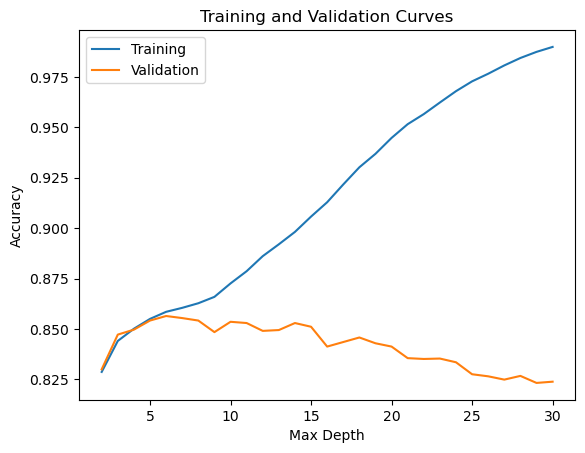

In [19]:
fig, ax = plt.subplots()
ax.plot(depth_range, dt_train_acc, label='Training')
ax.plot(depth_range, dt_valid_acc, label='Validation')
ax.set_xlabel('Max Depth')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Validation Curves')
ax.legend()
plt.show()

### Random Forest Models

In [20]:
rf_train_acc = []
rf_valid_acc = []
for depth in depth_range:
    np.random.seed(1)
    temp_forest = RandomForestClassifier(max_depth=depth, n_estimators=100)
    temp_forest.fit(X2_train, y2_train)
    train_acc = temp_forest.score(X2_train, y2_train)
    valid_acc = temp_forest.score(X2_valid, y2_valid)
    rf_train_acc.append(train_acc)
    rf_valid_acc.append(valid_acc)
rf_idx = np.argmax(rf_valid_acc)
rf_opt_depth = depth_range[rf_idx]
rf_opt_train_acc = rf_train_acc[rf_idx]
rf_opt_valid_acc = rf_valid_acc[rf_idx]
print("Optimal value for max_depth:          ", rf_opt_depth)
print("Training Accuracy for Optimal Model:  ", round(rf_opt_train_acc, 4))
print("Validation Accuracy for Optimal Model:", round(rf_opt_valid_acc, 4))

Optimal value for max_depth:           19
Training Accuracy for Optimal Model:   0.9192
Validation Accuracy for Optimal Model: 0.8643


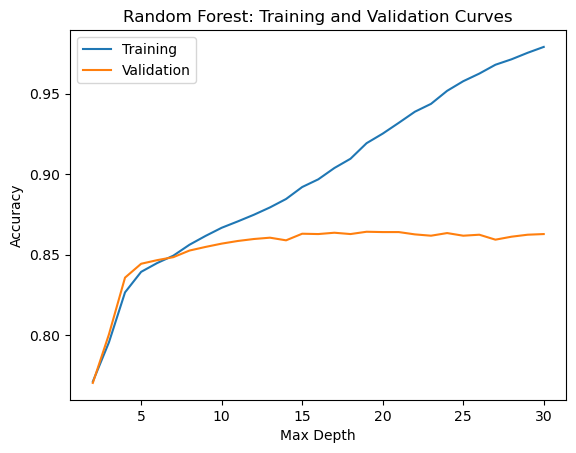

In [21]:
fig, ax = plt.subplots()
ax.plot(depth_range, rf_train_acc, label='Training')
ax.plot(depth_range, rf_valid_acc, label='Validation')
ax.set_xlabel('Max Depth')
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest: Training and Validation Curves')
ax.legend()
plt.show()

### Evaluate Final Model

In [22]:
np.random.seed(1)
final_model = RandomForestClassifier(max_depth=19, n_estimators=100)
final_model.fit(X2_train, y2_train)
final_train_acc = final_model.score(X2_train, y2_train)
final_valid_acc = final_model.score(X2_valid, y2_valid)
final_test_acc = final_model.score(X2_test, y2_test)
print("Training Accuracy for Final Model:  ", round(final_train_acc, 4))
print("Validation Accuracy for Final Model:", round(final_valid_acc, 4))
print("Testing Accuracy for Final Model:   ", round(final_test_acc, 4))

Training Accuracy for Final Model:   0.9192
Validation Accuracy for Final Model: 0.8643
Testing Accuracy for Final Model:    0.8624


In [23]:
test_pred = final_model.predict(X2_test)
cm = confusion_matrix(y2_test, test_pred)
labels = ['<=50K', '>50K']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
cm_df

,<=50K,>50K
<=50K,3505,204
>50K,468,708


In [24]:
report = classification_report(y2_test, test_pred)
print(report)

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      3709
        >50K       0.78      0.60      0.68      1176

    accuracy                           0.86      4885
   macro avg       0.83      0.77      0.80      4885
weighted avg       0.86      0.86      0.86      4885

